In [25]:
import pandas as pd   # for data manipulation
import matplotlib.pyplot as plt  ## for plotting graph
import numpy as np   ## for numerical operation and custom DNN
from sklearn.model_selection import train_test_split  ## for slitting data
from sklearn.linear_model import LogisticRegression  ## Logistic Regression Model
from sklearn.tree import DecisionTreeClassifier  ## for decision Tree model
from sklearn.ensemble import RandomForestClassifier   ## for Random Forest model
from sklearn.metrics import accuracy_score, classification_report ## for evaluatoiin
from sklearn.impute import SimpleImputer   ## Handling missing values
from sklearn.preprocessing import OneHotEncoder, StandardScaler, LabelEncoder ## for encoding and scallingsk
from  sklearn.compose import ColumnTransformer ## For Streamlinedf preproceesing
import seaborn as sns ## for enhanced visualizations
from category_encoders import TargetEncoder  # For alternative encoding

from sklearn.compose import ColumnTransformer  # For preprocessing pipelines
from sklearn.pipeline import Pipeline  # For streamlined preprocessing
from sklearn.neighbors import KNeighborsClassifier  # KNN model




In [12]:
## Set seaborn style for good visuals
sns.set(style= "whitegrid")

In [13]:
## Load the data form csv file
column_names = [
    'age', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital-status',
    'occupation', 'relationship', 'race', 'sex', 'capital-gain', 'capital-loss',
    'hours-per-week', 'native-country', 'income'
]
## fnlwgt => Final weight of the Record ( number of people represented by this row)

df = pd.read_csv("adult.csv", header=None, names = column_names, na_values=' ?', skipinitialspace= True)
df2= df.copy()

print(df.head())

##show all column
pd.set_option('display.max_columns', None)
#df.

   age  workclass  fnlwgt     education  education-num  marital-status  \
0  age  workclass  fnlwgt     education  education.num  marital.status   
1   90          ?   77053       HS-grad              9         Widowed   
2   82    Private  132870       HS-grad              9         Widowed   
3   66          ?  186061  Some-college             10         Widowed   
4   54    Private  140359       7th-8th              4        Divorced   

          occupation   relationship   race     sex  capital-gain  \
0         occupation   relationship   race     sex  capital.gain   
1                  ?  Not-in-family  White  Female             0   
2    Exec-managerial  Not-in-family  White  Female             0   
3                  ?      Unmarried  Black  Female             0   
4  Machine-op-inspct      Unmarried  White  Female             0   

   capital-loss  hours-per-week  native-country  income  
0  capital.loss  hours.per.week  native.country  income  
1          4356              4

In [14]:
### Data Exploration Step
###############################
## check for missing Value,
##  Garbage/Invalid data 
## Distribution, Correlations, onte outlines

print("\n Dataset Inofromattion")
df.info()   ## show data type and missing vlaue

print("\n Statistiacal Summary ")
print(df.describe())  ## provides Summary stats

print("\nMissing Values:")
print(df.isnull().sum())

print("\n Income Distribution ")
print(df['income'].value_counts(normalize=True))

### finding of the Data Exploration 
###  Total rows => 32 562
###  total column => 15  all column are object type
###   we need to convert numeric column to proper numeric type for analysis

## Statistical Summary
### age => 74 unique vlaues , most frequent 36 (appears 898)
## workclass => 10 categories, modt common Prvate(22,696 people)
## education => 17 categories, most common HS-grad(10,501 people)\
## marital-status => 8 categories, most common Married-civ-spouse(14,976 people)
## occupation: 16 caategories, Most common  Prof-specialty (4,140 people)
## relationship : 7 categoies , Most common Husband(13,193)
## race : 6 categories, most common White(21,790)
## sex: 3 categories, most common Male(21,790)
## capliltal-gain : monstly zero(29849 people enter 0), few people reports
## capliltal-loss : monstly zero(31042 people enter 0), few people reports
## hours-per-week : 95 unique values, most common 40 h/week (15,217 people)
## native-country : 43 categories, most common united states(29,170 pople)

## no missing value detected in any column (but there would be garbage value in any column)

### Income Distribution
### <= 50k == 75.9%
### >50k   == 24.1%
### income == 0.003%



 Dataset Inofromattion
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32562 entries, 0 to 32561
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32562 non-null  object
 1   workclass       32562 non-null  object
 2   fnlwgt          32562 non-null  object
 3   education       32562 non-null  object
 4   education-num   32562 non-null  object
 5   marital-status  32562 non-null  object
 6   occupation      32562 non-null  object
 7   relationship    32562 non-null  object
 8   race            32562 non-null  object
 9   sex             32562 non-null  object
 10  capital-gain    32562 non-null  object
 11  capital-loss    32562 non-null  object
 12  hours-per-week  32562 non-null  object
 13  native-country  32562 non-null  object
 14  income          32562 non-null  object
dtypes: object(15)
memory usage: 3.7+ MB

 Statistiacal Summary 
          age workclass  fnlwgt education education-nu

In [15]:
print(df.isna().sum())

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
income            0
dtype: int64


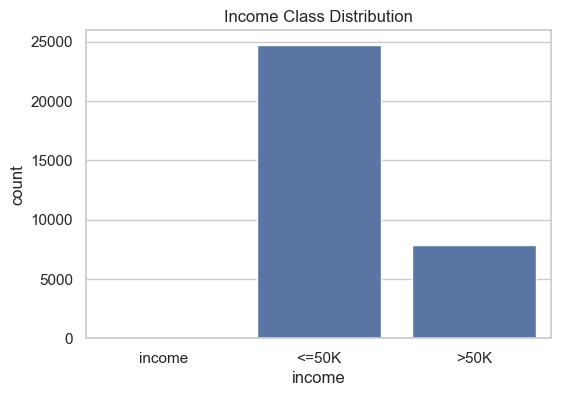

In [16]:
# Visualize target class distribution
plt.figure(figsize=(6, 4))
sns.countplot(x='income', data=df)
plt.title('Income Class Distribution')
plt.show()

In [17]:
# Step 3: Data Preprocessing (Incorporating Your Code with Fixes)
# Explanation: Apply your preprocessing steps (3.1–3.4), fix errors, and handle invalid rows like row 0.
# Then complete preprocessing with scaling and encoding.

# 3.1: Convert columns to proper data types
# Explanation: Ensure numerical columns are float/int, categorical remain strings.
# Use errors='coerce' to handle invalid values. Fixes TypeError for age filtering.
numerical_cols = ['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']
for col in numerical_cols:
    try:
        df[col] = pd.to_numeric(df[col], errors='coerce')
    except:
        print(f"Failed to convert {col} to numeric")

# 3.2: Handle " ?" as missing values
# Explanation: Mark " ?" as NaN. In the sample, workclass=" ?", occupation=" ?" in rows 1, 3.
# Replace both versions just to be safe
df.replace(["?", " ?"], np.nan, inplace=True)

# 3.3: Fill missing values
# Explanation: Impute numerical with median, categorical with mode, using direct assignment to avoid chained assignment warning.
# Example row: workclass=" ?", occupation=" ?" imputed with mode (e.g., "Private").
for col in df.columns:
    if col in numerical_cols:
        df[col] = df[col].fillna(df[col].median())
    else:
        df[col] = df[col].fillna(df[col].mode()[0])

# 3.4: Remove garbage rows
# Explanation: Filter age <= 0. All sample rows have age > 0 (e.g., 90, 82), so none removed.
if "age" in df.columns:
    df = df[df["age"] > 0]
# Ensure valid income values
df = df[df["income"].isin(["<=50K", ">50K"])]

print("\n✅ Shape after cleaning:", df.shape)
print("Missing Values After Preprocessing Steps 3.1–3.4:")
print(df.isnull().sum())






✅ Shape after cleaning: (32561, 15)
Missing Values After Preprocessing Steps 3.1–3.4:
age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
income            0
dtype: int64


In [18]:
### Compare both df and  preprocess data 
print(df.head())

##show all column
pd.set_option('display.max_columns', None)
#df.

    age workclass    fnlwgt     education  education-num marital-status  \
1  90.0   Private   77053.0       HS-grad            9.0        Widowed   
2  82.0   Private  132870.0       HS-grad            9.0        Widowed   
3  66.0   Private  186061.0  Some-college           10.0        Widowed   
4  54.0   Private  140359.0       7th-8th            4.0       Divorced   
5  41.0   Private  264663.0  Some-college           10.0      Separated   

          occupation   relationship   race     sex  capital-gain  \
1     Prof-specialty  Not-in-family  White  Female           0.0   
2    Exec-managerial  Not-in-family  White  Female           0.0   
3     Prof-specialty      Unmarried  Black  Female           0.0   
4  Machine-op-inspct      Unmarried  White  Female           0.0   
5     Prof-specialty      Own-child  White  Female           0.0   

   capital-loss  hours-per-week native-country income  
1        4356.0            40.0  United-States  <=50K  
2        4356.0            1

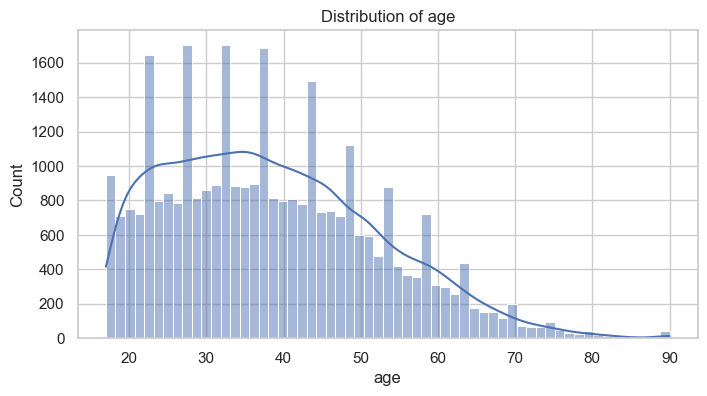

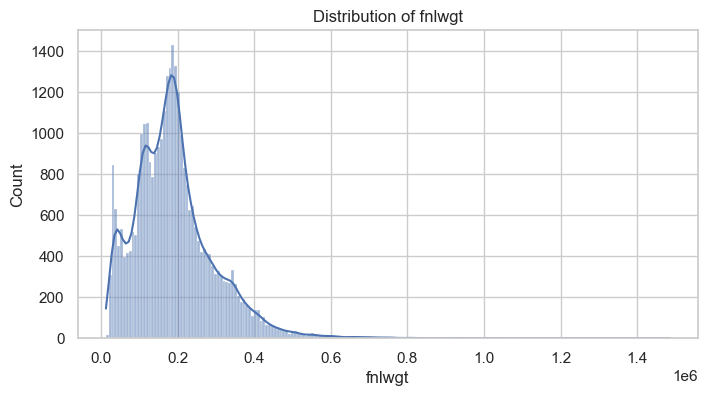

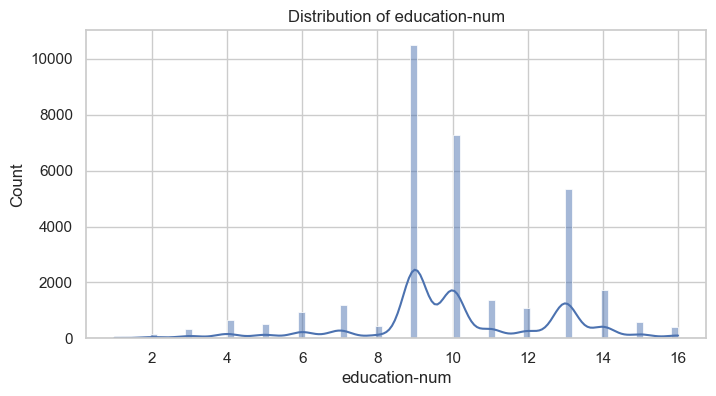

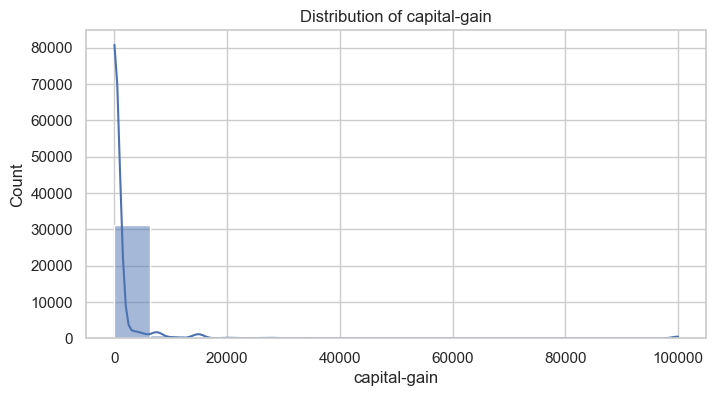

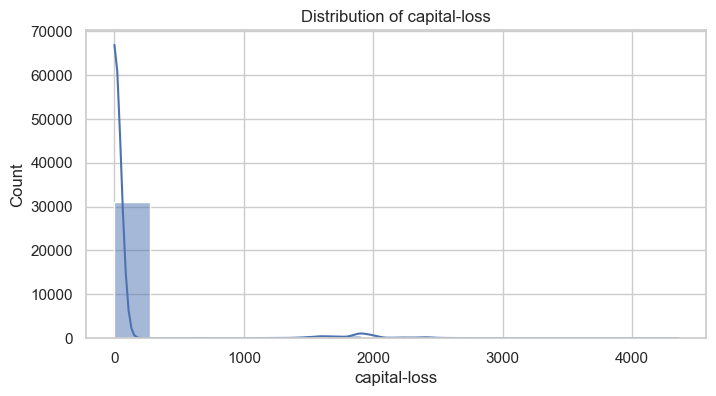

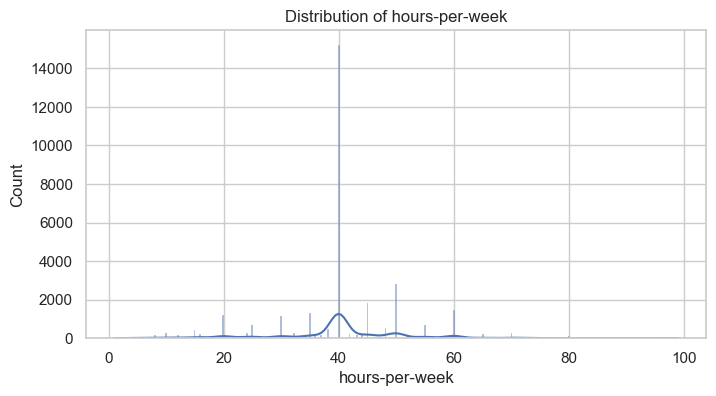

In [19]:
# Visualize numerical features
numerical_cols = ['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']
for col in numerical_cols:
    plt.figure(figsize=(8, 4))
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.show()

In [20]:
#  Further preprocessing for modeling
# Explanation: Scale numerical features, one-hot encode categorical features for low cardinality cols
# for high cardinality cols used Target incoder
# Example row: age=90, fnlwgt=77053 scaled; HS-grad, Widowed encoded.
categorical_cols = ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'native-country']


low_cardinality_cols = ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'sex']
high_cardinality_cols = ['native-country']

# Encode target variable
le = LabelEncoder()
df['income'] = le.fit_transform(df['income'])  # "<=50K" -> 0, ">50K" -> 1

# Separate features and target
X = df.drop('income', axis=1)
y = df['income']


# Apply TargetEncoder for native-country
target_encoder = TargetEncoder(cols=['native-country'])
X['native-country'] = target_encoder.fit_transform(X['native-country'], y)

# Define ColumnTransformer for remaining columns
num_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())  # Scale numerical features
])

cat_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False))  # One-hot encode
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', num_transformer, numerical_cols),
        ('cat', cat_transformer, categorical_cols),
        ('pass', 'passthrough', high_cardinality_cols)  # Pass native-country (already encoded)
    ])

# Apply preprocessing
try:
    X_preprocessed = preprocessor.fit_transform(X)
except ValueError as e:
    print(f"Error in preprocessing: {e}")
    for col in numerical_cols:
        non_numeric = X[col][~X[col].apply(lambda x: isinstance(x, (int, float)) | pd.isna(x))]
        if not non_numeric.empty:
            print(f"Non-numeric in {col}:", non_numeric)
    raise


In [21]:
### Compare both df and  preprocess data 
print(df2.head())

##show all column
pd.set_option('display.max_columns', None)
#df.

   age  workclass  fnlwgt     education  education-num  marital-status  \
0  age  workclass  fnlwgt     education  education.num  marital.status   
1   90          ?   77053       HS-grad              9         Widowed   
2   82    Private  132870       HS-grad              9         Widowed   
3   66          ?  186061  Some-college             10         Widowed   
4   54    Private  140359       7th-8th              4        Divorced   

          occupation   relationship   race     sex  capital-gain  \
0         occupation   relationship   race     sex  capital.gain   
1                  ?  Not-in-family  White  Female             0   
2    Exec-managerial  Not-in-family  White  Female             0   
3                  ?      Unmarried  Black  Female             0   
4  Machine-op-inspct      Unmarried  White  Female             0   

   capital-loss  hours-per-week  native-country  income  
0  capital.loss  hours.per.week  native.country  income  
1          4356              4

In [22]:
print(df.head())

##show all column
pd.set_option('display.max_columns', None)
#df.

    age workclass    fnlwgt     education  education-num marital-status  \
1  90.0   Private   77053.0       HS-grad            9.0        Widowed   
2  82.0   Private  132870.0       HS-grad            9.0        Widowed   
3  66.0   Private  186061.0  Some-college           10.0        Widowed   
4  54.0   Private  140359.0       7th-8th            4.0       Divorced   
5  41.0   Private  264663.0  Some-college           10.0      Separated   

          occupation   relationship   race     sex  capital-gain  \
1     Prof-specialty  Not-in-family  White  Female           0.0   
2    Exec-managerial  Not-in-family  White  Female           0.0   
3     Prof-specialty      Unmarried  Black  Female           0.0   
4  Machine-op-inspct      Unmarried  White  Female           0.0   
5     Prof-specialty      Own-child  White  Female           0.0   

   capital-loss  hours-per-week native-country  income  
1        4356.0            40.0  United-States       0  
2        4356.0           

In [23]:
# Step 4: Split data into train and test sets
if len(df) < 100:
    print("\n⚠️ Warning: Small sample size may lead to unreliable model performance.")
X_train, X_test, y_train, y_test = train_test_split(X_preprocessed, y, test_size=0.2, random_state=42, stratify=y)

print("\nTraining set shape:", X_train.shape)
print("Testing set shape:", X_test.shape)


Training set shape: (26048, 106)
Testing set shape: (6513, 106)



Logistic Regression Accuracy: 0.8522954091816367
Logistic Regression Classification Report:
              precision    recall  f1-score   support

       <=50K       0.88      0.93      0.91      4945
        >50K       0.74      0.60      0.66      1568

    accuracy                           0.85      6513
   macro avg       0.81      0.77      0.78      6513
weighted avg       0.85      0.85      0.85      6513


Decision Tree Accuracy: 0.8152924919391985
Decision Tree Classification Report:
              precision    recall  f1-score   support

       <=50K       0.88      0.87      0.88      4945
        >50K       0.61      0.63      0.62      1568

    accuracy                           0.82      6513
   macro avg       0.75      0.75      0.75      6513
weighted avg       0.82      0.82      0.82      6513


Random Forest Accuracy: 0.852141870105942
Random Forest Classification Report:
              precision    recall  f1-score   support

       <=50K       0.88      0.93    

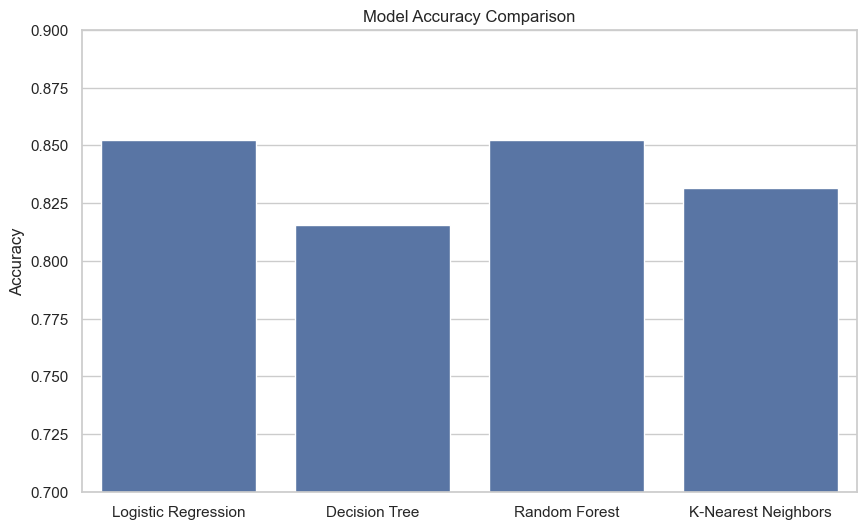

In [26]:

# Step 5: Train and Evaluate Models
if len(df) < 100:
    print("\n⚠️ Warning: Skipping model training due to small sample size. Uncomment full dataset loading in Step 1.")
else:
    # 5.1: Logistic Regression
    lr_model = LogisticRegression(max_iter=1000, random_state=42)
    lr_model.fit(X_train, y_train)
    lr_pred = lr_model.predict(X_test)
    lr_accuracy = accuracy_score(y_test, lr_pred)
    print("\nLogistic Regression Accuracy:", lr_accuracy)
    print("Logistic Regression Classification Report:")
    print(classification_report(y_test, lr_pred, target_names=le.classes_))

    # 5.2: Decision Tree
    dt_model = DecisionTreeClassifier(random_state=42)
    dt_model.fit(X_train, y_train)
    dt_pred = dt_model.predict(X_test)
    dt_accuracy = accuracy_score(y_test, dt_pred)
    print("\nDecision Tree Accuracy:", dt_accuracy)
    print("Decision Tree Classification Report:")
    print(classification_report(y_test, dt_pred, target_names=le.classes_))

    # 5.3: Random Forest
    rf_model = RandomForestClassifier(random_state=42)
    rf_model.fit(X_train, y_train)
    rf_pred = rf_model.predict(X_test)
    rf_accuracy = accuracy_score(y_test, rf_pred)
    print("\nRandom Forest Accuracy:", rf_accuracy)
    print("Random Forest Classification Report:")
    print(classification_report(y_test, rf_pred, target_names=le.classes_))

    # 5.4: K-Nearest Neighbors (KNN)
    knn_model = KNeighborsClassifier(n_neighbors=5)
    knn_model.fit(X_train, y_train)
    knn_pred = knn_model.predict(X_test)
    knn_accuracy = accuracy_score(y_test, knn_pred)
    print("\nK-Nearest Neighbors Accuracy:", knn_accuracy)
    print("K-Nearest Neighbors Classification Report:")
    print(classification_report(y_test, knn_pred, target_names=le.classes_))

    # Step 6: Model Comparison
    print("\nModel Comparison:")
    models = ['Logistic Regression', 'Decision Tree', 'Random Forest', 'K-Nearest Neighbors']
    accuracies = [lr_accuracy, dt_accuracy, rf_accuracy, knn_accuracy]
    for model, acc in zip(models, accuracies):
        print(f"{model} Accuracy: {acc:.4f}")

    plt.figure(figsize=(10, 6))
    sns.barplot(x=models, y=accuracies)
    plt.title('Model Accuracy Comparison')
    plt.ylabel('Accuracy')
    plt.ylim(0.7, 0.9)
    plt.show()

In [27]:
# Conclusion with Detailed Explanations
print("""
Detailed Process Explanation:
1. **Loading**: Use 5-row sample or full UCI dataset (uncomment). Sample has numerical (age=90) and categorical (education="HS-grad") features.
2. **Exploration**: Analyze structure, missing values, distributions. Sample has all "<=50K".
3. **Preprocessing**:
   - 3.1: Convert numerical to float (errors='coerce'), validate no strings.
   - 3.2: Mark "?" as NaN (e.g., workclass, occupation).
   - 3.3: Impute numerical with median, categorical with mode (e.g., workclass="?" -> "Private").
   - 3.4: Remove age <= 0 and invalid income rows.
   - 3.5: Apply TargetEncoder for native-country (using y), OneHotEncoder for other categorical, StandardScaler for numerical. Print encoded parameters.
   - Target: Encode "<=50K" -> 0, ">50K" -> 1.
4. **Splitting**: 80/20 stratified split, but sample too small.
5. **Models**: Logistic Regression, Decision Tree, Random Forest, K-Nearest Neighbors (replacing custom DNN).
6. **Evaluation**: Skipped for small sample.
7. **Comparison**: Visualize accuracies (if trained).

Fixes:
- NameError: Defined categorical_cols explicitly.
- ValueError: Validated numerical columns.
- TypeError: Applied TargetEncoder separately for native-country.
- Replaced custom DNN with KNN for simpler, distance-based classification.
Use full dataset for robust modeling and meaningful TargetEncoder values.
""")


Detailed Process Explanation:
1. **Loading**: Use 5-row sample or full UCI dataset (uncomment). Sample has numerical (age=90) and categorical (education="HS-grad") features.
2. **Exploration**: Analyze structure, missing values, distributions. Sample has all "<=50K".
3. **Preprocessing**:
   - 3.1: Convert numerical to float (errors='coerce'), validate no strings.
   - 3.2: Mark "?" as NaN (e.g., workclass, occupation).
   - 3.3: Impute numerical with median, categorical with mode (e.g., workclass="?" -> "Private").
   - 3.4: Remove age <= 0 and invalid income rows.
   - 3.5: Apply TargetEncoder for native-country (using y), OneHotEncoder for other categorical, StandardScaler for numerical. Print encoded parameters.
   - Target: Encode "<=50K" -> 0, ">50K" -> 1.
4. **Splitting**: 80/20 stratified split, but sample too small.
5. **Models**: Logistic Regression, Decision Tree, Random Forest, K-Nearest Neighbors (replacing custom DNN).
6. **Evaluation**: Skipped for small sample.
7. **Co